# Linear Regression

This notebook presents concepts and implementations of Linear Regression. 
It also has some experiments comparing my implementation with [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) implementation of linear regression and other experiments based on Programming Exercise 1 of course [Machine Learning on Coursera](https://www.coursera.org/learn/machine-learning).

## 1. Linear Regression with One Variable

Univariate linear regression: predict a single output value $y$ from a single input value $x$.

### 1.1 Hypothesis Function

$y = h_{\theta}(x) = \theta_0 + \theta_1x$ (equation of a straight line)

Our goal is to find the best values of $\theta_0$ and $\theta_1$ which provide the most representative straight line through the data points mapped on the x-y plane.

### 1.2 Cost Function

In order to find the best values for the parameters $\theta$, we need a measure of how well (or poorly) the model fits the training data, that is, a cost function. The most common performance measure of a regression model is the Root Mean Square Error (RMSE), an average of all the results of the hypothesis with inputs from $x$ compared to the actual output $y$.

$J(\theta_0,\theta_1)= \frac{1}{2m} \sum_{i=1}^m (h_\theta(x_i) - y_i)^2 $

$m$ is the number of training examples.

The hypothesis can be written using a vectorized form: $y = h_\theta(x) = \theta^Tx$

In [1]:
import numpy as np
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

### 1.3 Gradient Descent
So we have our hypothesis function and we have a way of measuring how well it fits into the data. Now we need to estimate the parameters in hypothesis function. That's where gradient descent comes in.

Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to the parameter $\theta$ and goes in the direction of descending gradient.

Algorithm:

repeat until convergence:
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Learning rate to small: slow gradient descent
* Learning rate to large: gradient descent can overshoot the minimum, may fail to converge

### 1.4 Gradient Descent for Linear Regression

We can substitute our actual cost function and our actual hypothesis function and modify the equation to:

Derivatives:

$j=0: \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)$

$j=1: \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i) \cdot x^i$

so, the algorithm will be:

repeat until convergence:

$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)$

$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m ((h_\theta(x_i) - y_i) \cdot x^i)$

* Obs.: For linear regression, the RMSE is a convex function, so there is just one global minimum.

In [2]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

### 1.5 Experiments

#### Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Dataset
> "Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss."

In [4]:
df = pd.read_csv('data/ex1data1.txt', sep=',', header=None)
df.columns = ['population', 'profit']

#### Data Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


* The dataset has 97 examples
* Both population (feature) and profit (target feature) are of type float
* There are no missing values

In [6]:
df.sample(2)

,population,profit
84,6.5159,5.3436
13,8.4084,7.2258


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,97.0,8.159800,3.869884,5.0269,5.7077,6.5894,8.5781,22.203
profit,97.0,5.839135,5.510262,-2.6807,1.9869,4.5623,7.0467,24.147


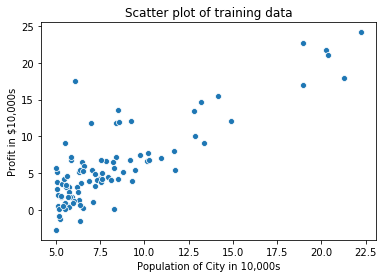

In [8]:
ax = sns.scatterplot(x='population', y='profit', data=df)
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Scatter plot of training data');

The plot shows that they have a linear relationship.

#### Testing the Cost Function

In [9]:
m = df.shape[0]
print('Number of examples:', m)

Number of examples: 97


In [10]:
X = np.ones((m,2))
X[:,1] = df.population.values
y = np.array(df.profit.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [11]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.0727338775
Expected cost value (approx) 32.07


In [12]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 54.242455082
Expected cost value (approx) 54.24


#### Running Gradient Descent

In [13]:
iterations = 10000
alpha = 0.01
theta = np.zeros(shape=(X.shape[1],1))
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[-3.89578082]
 [ 1.19303364]]


Equivalent code using Scikit-Learn:

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df.population.values.reshape(-1,1), 
            df.profit.values.reshape(-1,1))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lin_reg.intercept_, lin_reg.coef_

(array([-3.89578088]), array([[ 1.19303364]]))

#### Plot the linear fit

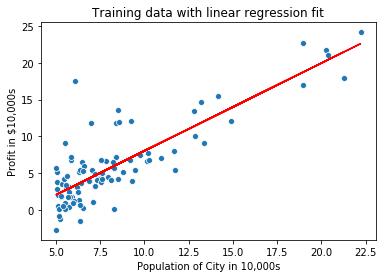

In [16]:
ax = sns.scatterplot(x='population', y='profit', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');

#### Using the fitted model to make predictions on profits in areas of 35,000 and 70,000 people

In [17]:
y_pred = np.array([1, 3.5]).dot(theta)
f'For population = 35,000, we predict a profit of {y_pred[0]*10000}'

'For population = 35,000, we predict a profit of 2798.3691398645315'

In [18]:
y_pred = np.array([1, 7]).dot(theta)
f'For population = 70,000, we predict a profit of {y_pred[0]*10000}'

'For population = 70,000, we predict a profit of 44554.546482411424'

#### Visualizing the Cost Function J($\theta$):

In [19]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [20]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [21]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

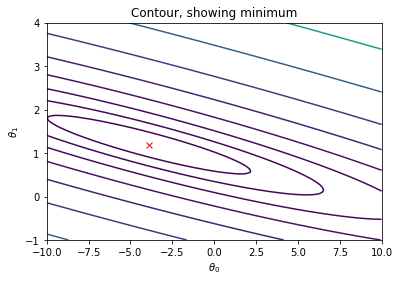

In [22]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

## 2. Linear Regression with Multiple Variables

Multivariate linear regression: predict a single output value $y$ from any number of input variables in $x$.

### 2.1 Hypothesis Function

$y = h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \theta^Tx = X\theta$

where $n$ is the number of features and $x_0^{(i)} = 1$ for $(i \in 1,...,m)$

### 2.2 Cost Function

The cost function is the same used in univariate linear regression. 

$J(\theta)= \frac{1}{2m} \sum_{i=1}^m (h_\theta(x_i) - y_i)^2 = \frac{1}{2m}(X\theta-y)^T(X\theta-y)$ (this second formula is the vectorized form)


In [23]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

### 2.3 Gradient Descent for Multiple Variables
The gradient descent equation itself is generally the same form; we just have to repeat it for our $n$ features:

repeat until convergence:
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^i) - y^i) \cdot x_j^i$ (for j:=0..n)

vectorized: $\theta := \theta - \frac{\alpha}{m}X^T(X\theta-y)$

In [24]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

Tips:
* Make a plot with number of iterations on the x-axis. Now plot the cost function, $J(\theta)$ over the number of iterations of gradient descent. If $J(\theta)$  ever increases, then you probably need to decrease $\alpha$.
* Declare convergence if $J(\theta)$ decreases by less than E in one iteration, where E is some small value such as $10^{−3}$.

### 2.4 Feature Normalization

We can speed up gradient descent by having each of our input values in roughly the same range, ideally $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Feature scaling: involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable
* Mean normalization: involves subtracting the average value for an input variable from the values for that input variable

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.

In [25]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

### 2.5 Polynomial Regression

We can use a linear model to fit nonlinear data, by addding powers of each feature as new features and making the hypothesis function a quadratic, cubic or square root function.



In [26]:
def map_feature(X1, X2, degree):
    X1 = np.array(X1).reshape(-1,1)
    X2 = np.array(X2).reshape(-1,1)
    
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            p = (X1**(i-j)) * (X2**j)
            out = np.append(out, p, axis=1)
    return out

### 2.6 Normal Equation

A closed-form solution to find $\theta$ without iteration.

$\theta = (X^TX)^{-1}X^Ty$

In [27]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

### 2.7 Experiments

#### Dataset
> "Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file ex1data2.txt contains a training set of housing prices in Port- land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house."

In [28]:
df2 = pd.read_csv('data/ex1data2.txt', sep=',', header=None)
df2.columns = ['house_size', 'bedrooms', 'house_price']

#### Data Visualization

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
house_size     47 non-null int64
bedrooms       47 non-null int64
house_price    47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


* The dataset has 47 examples
* All the features are of type int
* There are no missing values

In [30]:
df2.sample(2)

,house_size,bedrooms,house_price
5,1985,4,299900
0,2104,3,399900


In [31]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


> "House sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly."

Relation between the features and the target:

In [32]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [33]:
p1 = go.Scatter3d(x = df2['house_size'],
                  y = df2['bedrooms'],
                  z = df2['house_price'],
                  mode = 'markers')

layout = go.Layout(
    title='Scatter Plot 3D of training data',
    scene=dict(
        xaxis=dict(
            title='House Size',
        ),
        yaxis=dict(
            title='Bedrooms',
        ),
        zaxis=dict(
            title='House Price',
        )
    )
)
fig = go.Figure(data=[p1], layout=layout)
py.iplot(fig)

#### Feature Normalization

In [34]:
X_norm, mu, sigma = feature_normalize(df2[['house_size', 'bedrooms']])

In [35]:
df2['house_size_normalized'] = X_norm[:,0]
df2['bedrooms_normalized'] = X_norm[:,1]
df2.head()

,house_size,bedrooms,house_price,house_size_normalized,bedrooms_normalized
0,2104,3,399900,0.130010,-0.223675
1,1600,3,329900,-0.504190,-0.223675
2,2400,3,369000,0.502476,-0.223675
3,1416,2,232000,-0.735723,-1.537767
4,3000,4,539900,1.257476,1.090417


#### Running Gradient Descent

In [36]:
m = df2.shape[0]
X_i = np.ones((m,3))
X_i[:,1:] = X_norm
X = X_i
y = np.array(df2.house_price.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [37]:
iterations = 10000
alpha = 0.01
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[ 340412.65957447]
 [ 110631.05027884]
 [  -6649.47427082]]


Equivalent code using Scikit-Learn:

In [38]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_norm, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
lin_reg.intercept_, lin_reg.coef_

(array([ 340412.65957447]), array([[ 110631.05027885,   -6649.47427082]]))

Plot linear regresion line

In [40]:
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
z_vals = np.zeros(shape=(100, 100))
for i in range(0, len(x_vals)):
    for j in range(0, len(y_vals)):
        z_vals[i,j] = theta[0] + theta[1]*x_vals[i] + theta[2]*y_vals[j] 

In [41]:
p1 = go.Scatter3d(x = X_norm[:,0],
                  y = X_norm[:,1],
                  z = df2['house_price'],
                  mode = 'markers')
p2 = go.Surface(x=x_vals, y=y_vals, z=z_vals)

layout = go.Layout(
    title='Scatter Plot 3D of training data with the fitted linear regression',
    scene=dict(
        xaxis=dict(
            title='House Size',
        ),
        yaxis=dict(
            title='Bedrooms',
        ),
        zaxis=dict(
            title='House Price',
        )
    )
)

fig = go.Figure([p1,p2], layout=layout)
py.iplot(fig)

#### Selecting learning rates

In [42]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

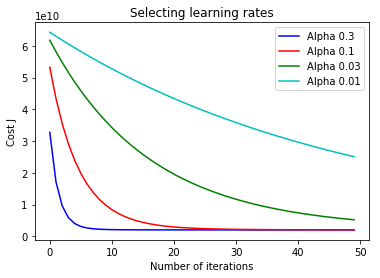

In [43]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

#### Fitting the model again with the best learning rate:

In [44]:
alpha = 0.1
num_iters = 250
theta = np.zeros(shape=(X.shape[1],1))
theta, _ = gradient_descent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[ 340412.65957447]
 [ 110631.05027885]
 [  -6649.47427082]]


#### Estimate the price of a 1650 sq-ft, 3 bedrooms house

In [45]:
sqft = (1650 - mu[0])/sigma[0]
bedrooms = (3 - mu[1])/sigma[1]
y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 293081.46433489595$'

#### Normal Equation

Obs.: don't need to normalize the data

In [46]:
Xe = np.ones((m,3))
Xe[:,1:] = df2[['house_size', 'bedrooms']].values
theta_e = normal_eqn(Xe, y)
theta_e

array([[ 89597.90954333],
       [   139.21067402],
       [ -8738.01911248]])

In [47]:
y_pred = theta_e[0] + theta_e[1]*1650 + theta_e[2]*3
f'Price of a house with 1650 square feet and 3 bedrooms: {y_pred[0]}$'

'Price of a house with 1650 square feet and 3 bedrooms: 293081.4643349508$'